In [1]:
import pandas as pd

In [2]:
iris_df = pd.read_csv('./data/iris.csv')

In [3]:
iris_df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa


In [4]:
X = iris_df.drop(columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = iris_df['species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#clf = DecisionTreeClassifier()
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, y_pred)

1.0

In [15]:
clf.feature_importances_

array([0.10866435, 0.03520198, 0.47007812, 0.38605555])

In [16]:
import matplotlib.pyplot as plt

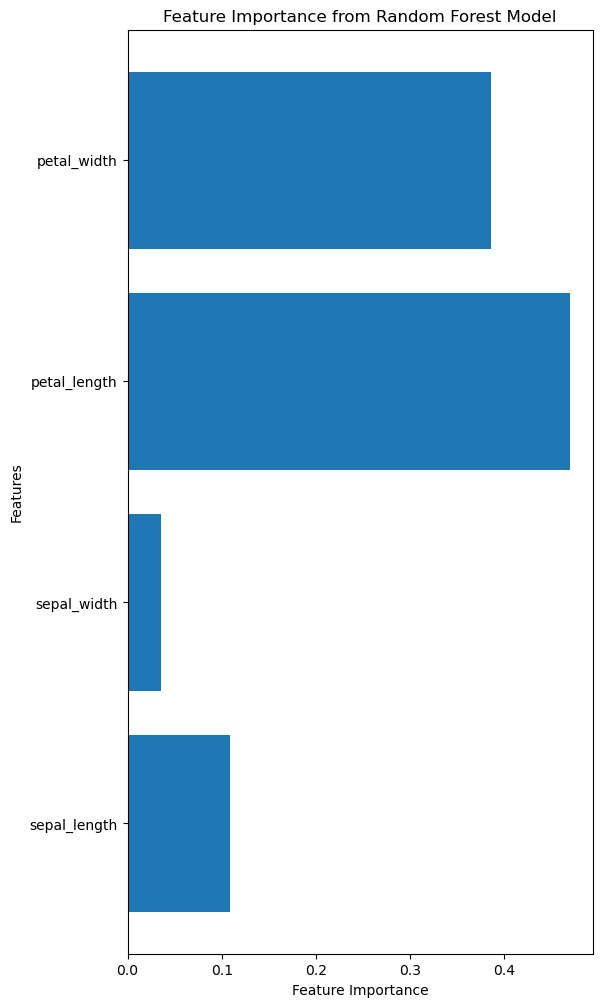

In [17]:
plt.figure(figsize=(6, 12))
plt.barh(X.columns, clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.show()

In [18]:
clf.feature_importances_ / max(clf.feature_importances_)

array([0.23116231, 0.07488538, 1.        , 0.82125829])